In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer # n-gram
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from konlpy.tag import Okt,Hannanum, Kkma, Komoran
import time
import openpyxl
import re
import warnings
#from pykospacing import Spacing
#from mecab import MeCab

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
file_path = './Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830.xlsx'

df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,02100101.20170901162121001,20170901,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,NaN,"윤부근,유일한,윤,고동진","요리,독일,미국,유럽,한국,샌프란시스코,인천공항,베를린","올레드TV,삼성전자,아마존,알렉사,빅스비","AI,영화,요리,스마트홈,독일,세계가전,박람회,IFA,전자업체,IoT,경쟁,1일,현...","iot,삼성전자,ai,빅스비,독일,tv,관계자,전시장,lg전자,구글,ifa,냉장고,...",◆ 독일 세계가전박람회(IFA 2017) / 전자업체들 IoT 경쟁 본격화 ◆\n ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
1,02100101.20170901160436001,20170901,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,NaN,류창수,"천안시,천안역,첨단,천안","천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
2,02100101.20170901084332002,20170901,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,NaN,박종선,중국,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
3,02100101.20170901134823001,20170901,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,NaN,"고,고동진","독일,미국,영국,뉴욕,베를린",NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
4,02100101.20170901111143002,20170901,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,NaN,NaN,한국,"삼성,삼성전자","삼성,갤노트,FE,사실,완판,소비자,방증,신뢰,회복,삼성전자,갤럭시,노트,제작,한정...","갤럭시,대리점,인피니티,출고가,완판,소비자,삼성전자,삼성,가능성,가격적,갤노트,2만...",삼성전자가 갤럭시 노트7을 기반으로 제작해 국내에 한정 출시한 갤럭시 노트FE(Fa...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,02100311.20240830115422001,20240830,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,엄민용,"방산,미국,암센터,미,모잠비크","FDA,AZ임핀,삼성전자,현대차,에릭슨,한화오션,MD앤더슨,NEXT,미래에셋증권,리...","삼성전자,노키아,모바일,네트워크,인수,관심,소식,매수,미래에셋증권,집계,미래에셋증권...","미래에셋증권,미국,삼성중공업,노키아,에이비엘바이오,삼성전자,유한양행,투자자,치료제,...",미래에셋증권에서 거래하는 고수익 투자자들이 30일 오전 가장 많이 순매수한 종목은 ...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN
37456,02100311.20240830093243001,20240830,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,NaN,"유럽,핀란드","애플,에릭슨,삼성전자,노키아,화웨이,삼성","삼성전자,네트워크,인수,노키아,모바일,네트워크,관심,표명,금액,인수,13.4,삼성전...","노키아,네트워크,블룸버그,삼성전자,핀란드,소식통,유로,화웨이,삼성,스마트폰,사업자",삼성전자가 핀란드 통신장비업체 노키아의 모바일 네트워크 자산 인수에 관심을 보이고 ...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN
37457,02100601.20240830090609001,20240830,한국경제,김소연,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,NaN,"유럽,핀란드","애플,에릭슨,삼성전자,핀란드,노키아,화웨이","삼성전자,노키아,모바일,네트워크,인수,블룸버그,관심,삼성전자,노키아,모바일,네트워크...","노키아,삼성전자,네트워크,블룸버그,화웨이,핀란드,사업부,스마트폰,사업자,경쟁사,소식통",삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인다는 보도가 나왔다. \...,https://www.hankyung.com/article/2024083059647,NaN
37458,02100601.20240830173945001,20240830,한국경제,박의명,"삼성전자, 노키아 통신장비 사업부 품나",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,이재용,"미국,중국,유럽","지멘스,MS,ZTE,삼성전자,노키아,삼성,차세대 통신 연구센터,애플,마이크로소프트,...","삼성전자,노키아,통신,장비,사업부,품나,삼성전자,노키아,인수,통신,장비,사업,검토,...","노키아,삼성전자,네트워크,사업부,화웨이,휴대폰,이동통신,유로,통신사,사업부문,13조...",삼성전자가 노키아의 통신장비 사업부문 인수를 검토 중인 것으로 알려졌다. 무선 통신...,https://www.hankyung.com/article/2024083076691,NaN


크롤링 과정에서 중복건이 발생할 수 있어 확인했으나 이상 없음

In [6]:
df_bigkinds = df_bigkinds.drop_duplicates()

df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,02100101.20170901162121001,20170901,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,NaN,"윤부근,유일한,윤,고동진","요리,독일,미국,유럽,한국,샌프란시스코,인천공항,베를린","올레드TV,삼성전자,아마존,알렉사,빅스비","AI,영화,요리,스마트홈,독일,세계가전,박람회,IFA,전자업체,IoT,경쟁,1일,현...","iot,삼성전자,ai,빅스비,독일,tv,관계자,전시장,lg전자,구글,ifa,냉장고,...",◆ 독일 세계가전박람회(IFA 2017) / 전자업체들 IoT 경쟁 본격화 ◆\n ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
1,02100101.20170901160436001,20170901,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,NaN,류창수,"천안시,천안역,첨단,천안","천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
2,02100101.20170901084332002,20170901,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,NaN,박종선,중국,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
3,02100101.20170901134823001,20170901,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,NaN,"고,고동진","독일,미국,영국,뉴욕,베를린",NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
4,02100101.20170901111143002,20170901,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,NaN,NaN,한국,"삼성,삼성전자","삼성,갤노트,FE,사실,완판,소비자,방증,신뢰,회복,삼성전자,갤럭시,노트,제작,한정...","갤럭시,대리점,인피니티,출고가,완판,소비자,삼성전자,삼성,가능성,가격적,갤노트,2만...",삼성전자가 갤럭시 노트7을 기반으로 제작해 국내에 한정 출시한 갤럭시 노트FE(Fa...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,02100311.20240830115422001,20240830,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,엄민용,"방산,미국,암센터,미,모잠비크","FDA,AZ임핀,삼성전자,현대차,에릭슨,한화오션,MD앤더슨,NEXT,미래에셋증권,리...","삼성전자,노키아,모바일,네트워크,인수,관심,소식,매수,미래에셋증권,집계,미래에셋증권...","미래에셋증권,미국,삼성중공업,노키아,에이비엘바이오,삼성전자,유한양행,투자자,치료제,...",미래에셋증권에서 거래하는 고수익 투자자들이 30일 오전 가장 많이 순매수한 종목은 ...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN
37456,02100311.20240830093243001,20240830,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,NaN,"유럽,핀란드","애플,에릭슨,삼성전자,노키아,화웨이,삼성","삼성전자,네트워크,인수,노키아,모바일,네트워크,관심,표명,금액,인수,13.4,삼성전...","노키아,네트워크,블룸버그,삼성전자,핀란드,소식통,유로,화웨이,삼성,스마트폰,사업자",삼성전자가 핀란드 통신장비업체 노키아의 모바일 네트워크 자산 인수에 관심을 보이고 ...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN
37457,02100601.20240830090609001,20240830,한국경제,김소연,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,NaN,"유럽,핀란드","애플,에릭슨,삼성전자,핀란드,노키아,화웨이","삼성전자,노키아,모바일,네트워크,인수,블룸버그,관심,삼성전자,노키아,모바일,네트워크...","노키아,삼성전자,네트워크,블룸버그,화웨이,핀란드,사업부,스마트폰,사업자,경쟁사,소식통",삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인다는 보도가 나왔다. \...,https://www.hankyung.com/article/2024083059647,NaN
37458,02100601.20240830173945001,20240830,한국경제,박의명,"삼성전자, 노키아 통신장비 사업부 품나",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,이재용,"미국,중국,유럽","지멘스,MS,ZTE,삼성전자,노키아,삼성,차세대 통신 연구센터,애플,마이크로소프트,...","삼성전자,노키아,통신,장비,사업부,품나,삼성전자,노키아,인수,통신,장비,사업,검토,...","노키아,삼성전자,네트워크,사업부,화웨이,휴대폰,이동통신,유로,통신사,사업부문,13조...",삼성전자가 노키아의 통신장비 사업부문 인수를 검토 중인 것으로 알려졌다. 무선 통신...,https://www.hankyung.com/article/2024083076691,NaN


전처리(제목과 세부내용이 겹쳐서 세부내용 일부 전처리, 제목 제거 후 제목+세부내용으로 병합하여 처리)

In [9]:
df_bigkinds.dtypes

뉴스 식별자               object
일자                    int64
언론사                  object
기고자                  object
제목                   object
통합 분류1               object
통합 분류2               object
통합 분류3               object
사건/사고 분류1            object
사건/사고 분류2            object
사건/사고 분류3            object
인물                   object
위치                   object
기관                   object
키워드                  object
특성추출(가중치순 상위 50개)    object
본문                   object
URL                  object
분석제외 여부              object
dtype: object

In [11]:
# '일자' 열을 명시적으로 'YYYYMMDD' 형식으로 변환
df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'], format='%Y%m%d')

C:\Users\dybae\AppData\Local\Temp\ipykernel_16108\2768489036.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2017-09-01 00:00:00', '2017-09-01 00:00:00', '2017-09-01 00:00:00',
 '2017-09-01 00:00:00', '2017-09-01 00:00:00', '2017-09-01 00:00:00',
 '2017-09-01 00:00:00', '2017-09-01 00:00:00', '2017-09-01 00:00:00',
 '2017-09-01 00:00:00',
 ...
 '2024-08-30 00:00:00', '2024-08-30 00:00:00', '2024-08-30 00:00:00',
 '2024-08-30 00:00:00', '2024-08-30 00:00:00', '2024-08-30 00:00:00',
 '2024-08-30 00:00:00', '2024-08-30 00:00:00', '2024-08-30 00:00:00',
 '2024-08-30 00:00:00']
Length: 37460, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'], format='%Y%m%d')


In [13]:
len(df_bigkinds)

37460

In [15]:
df_bigkinds['제목_키워드'] = df_bigkinds['제목'] + ' ' + df_bigkinds['키워드']

In [17]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드
0,02100101.20170901162121001,2017-09-01,매일경제,"김동은,오찬종",AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈,IT_과학>모바일,IT_과학>과학,IT_과학>보안,NaN,NaN,NaN,"윤부근,유일한,윤,고동진","요리,독일,미국,유럽,한국,샌프란시스코,인천공항,베를린","올레드TV,삼성전자,아마존,알렉사,빅스비","AI,영화,요리,스마트홈,독일,세계가전,박람회,IFA,전자업체,IoT,경쟁,1일,현...","iot,삼성전자,ai,빅스비,독일,tv,관계자,전시장,lg전자,구글,ifa,냉장고,...",◆ 독일 세계가전박람회(IFA 2017) / 전자업체들 IoT 경쟁 본격화 ◆\n ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI,영화,요리,스마트홈..."
1,02100101.20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,NaN,류창수,"천안시,천안역,첨단,천안","천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이..."
2,02100101.20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,NaN,박종선,중국,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,..."
3,02100101.20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,NaN,"고,고동진","독일,미국,영국,뉴욕,베를린",NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트..."
4,02100101.20170901111143002,2017-09-01,매일경제,박진형,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증",IT_과학>모바일,경제>자동차,경제>유통,NaN,NaN,NaN,NaN,한국,"삼성,삼성전자","삼성,갤노트,FE,사실,완판,소비자,방증,신뢰,회복,삼성전자,갤럭시,노트,제작,한정...","갤럭시,대리점,인피니티,출고가,완판,소비자,삼성전자,삼성,가능성,가격적,갤노트,2만...",삼성전자가 갤럭시 노트7을 기반으로 제작해 국내에 한정 출시한 갤럭시 노트FE(Fa...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트FE`, 사실상 `완판` 소비자 신뢰 회복 방증 삼성,갤노트,FE,사실..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,02100311.20240830115422001,2024-08-30,서울경제,박시은 기자,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위",경제>반도체,경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,엄민용,"방산,미국,암센터,미,모잠비크","FDA,AZ임핀,삼성전자,현대차,에릭슨,한화오션,MD앤더슨,NEXT,미래에셋증권,리...","삼성전자,노키아,모바일,네트워크,인수,관심,소식,매수,미래에셋증권,집계,미래에셋증권...","미래에셋증권,미국,삼성중공업,노키아,에이비엘바이오,삼성전자,유한양행,투자자,치료제,...",미래에셋증권에서 거래하는 고수익 투자자들이 30일 오전 가장 많이 순매수한 종목은 ...,http://www.sedaily.com/NewsView/2DD7US8DM2,NaN,"[주식 초고수는 지금]삼성전자, 노키아 모바일 네트워크 인수 관심 소식에 순매수 1..."
37456,02100311.20240830093243001,2024-08-30,서울경제,정혜진 기자,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,NaN,"유럽,핀란드","애플,에릭슨,삼성전자,노키아,화웨이,삼성","삼성전자,네트워크,인수,노키아,모바일,네트워크,관심,표명,금액,인수,13.4,삼성전...","노키아,네트워크,블룸버그,삼성전자,핀란드,소식통,유로,화웨이,삼성,스마트폰,사업자",삼성전자가 핀란드 통신장비업체 노키아의 모바일 네트워크 자산 인수에 관심을 보이고 ...,http://www.sedaily.com/NewsView/2DD7U9W3FH,NaN,"""삼성전자, 노키아 모바일 네트워크 부문 인수에 관심 표명"" 삼성전자,네트워크,인수..."
37457,02100601.20240830090609001,2024-08-30,한국경제,김소연,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여""",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,NaN,"유럽,핀란드","애플,에릭슨,삼성전자,핀란드,노키아,화웨이","삼성전자,노키아,모바일,네트워크,인수,블룸버그,관심,삼성전자,노키아,모바일,네트워크...","노키아,삼성전자,네트워크,블룸버그,화웨이,핀란드,사업부,스마트폰,사업자,경쟁사,소식통",삼성전자가 노키아의 모바일 네트워크 자산 인수에 관심을 보인다는 보도가 나왔다. \...,https://www.hankyung.com/article/2024083059647,NaN,"삼성전자, 노키아 모바일 네트워크 인수하나 블룸버그 ""관심 보여"" 삼성전자,노키아,..."
37458,02100601.20240830173945001,2024-08-30,한국경제,박의명,"삼성전자, 노키아 통신장비 사업부 품나",경제>반도체,IT_과학>모바일,경제>금융_재테크,NaN,NaN,NaN,이재용,"미국,중국,유럽","지멘스,MS,ZTE,삼성전자,노키아,삼성,차세대 통신 연구센터,애플,마이크로소프트,...","삼성전자,노키아,통신,장비,사업부,품나,삼성전자,노키아,인수,통신,장비,사업,검토,...","노키아,삼성전자,네트워크,사업부,화웨이,휴대폰,이동통신,유로,통신사,사업부문,13조...",삼성전자가 노키아의 통신장비 사업부문 인수를 검토 중인 것으로 알려

크롤링시 제목은 전처리하고 세부내용 전처리하지 않아 동일하게 처리

In [20]:
# 아래코드 넣어야 warning 발생하지 않음
df_bigkinds = df_bigkinds.copy() 
df_bigkinds.loc[:,'제목_키워드_전처리후']  = df_bigkinds['제목_키워드'].copy()
def clean_text(text):
    # [^A-Za-z0-9가-힣\+\-\.\%] 부분이 알파벳, 숫자, 한글, 허용된 특수문자 이외의 모든 문자를 대상으로 합니다.
    return re.sub('[^A-Za-z0-9가-힣\+\-\.\%]', ' ', text)

df_bigkinds['제목_키워드_전처리후'] = df_bigkinds['제목_키워드_전처리후'].apply(clean_text)

In [21]:
df_bigkinds[['일자','제목_키워드_전처리후']]

,일자,제목_키워드_전처리후
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 ...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실...
...,...,...
37455,2024-08-30,주식 초고수는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식에 순매수 1...
37456,2024-08-30,삼성전자 노키아 모바일 네트워크 부문 인수에 관심 표명 삼성전자 네트워크 인수...
37457,2024-08-30,삼성전자 노키아 모바일 네트워크 인수하나 블룸버그 관심 보여 삼성전자 노키아 ...
37458,2024-08-30,삼성전자 노키아 통신장비 사업부 품나 삼성전자 노키아 통신 장비 사업부 품나 삼성...


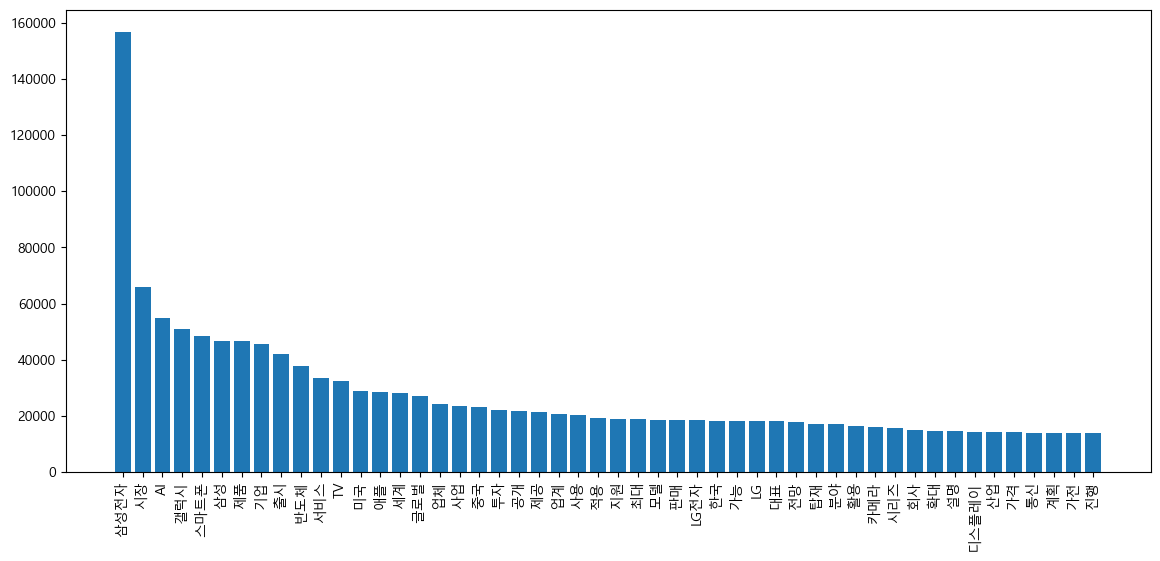

In [22]:
# '제목_세부내용_전처리후' 열에서 NaN 또는 float 값을 빈 문자열로 변환
df_bigkinds['제목_키워드_전처리후'] = df_bigkinds['제목_키워드_전처리후'].apply(lambda x: str(x) if isinstance(x, str) else '')

plt.figure(figsize=(14,6))

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

4. 기본 전처리

In [24]:
# 앞뒤 공백 제거
df_bigkinds.loc[:, '제목_키워드_전처리후'] = df_bigkinds['제목_키워드_전처리후'].str.strip()

# 중간 공백 제거
df_bigkinds.loc[:, '제목_키워드_전처리후'] = df_bigkinds['제목_키워드_전처리후'].str.replace('\s+', ' ', regex=True)

In [25]:
df_bigkinds[['일자','제목_키워드_전처리후']][0:50]

,일자,제목_키워드_전처리후
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...
5,2017-09-01,깃털처럼 가볍다 시장구도 바꿀것 LG V30 외신들 호평 깃털 시장구 LG 외신 호...
6,2017-09-01,삼성 자율주행차 실리콘밸리 면허 땄다 삼성 자율 주행차 실리콘밸리 면허 땄다 미국 ...
7,2017-09-01,삼성 자율주행차 실리콘밸리 돌아다닌다 삼성 자율 주행차 실리콘밸리 실리콘밸리 삼성전...
8,2017-09-01,배당주펀드엔 삼성전자 KB금융 안빠지네 배당주펀드 삼성전자 KB금융 안빠지네 수익 ...
9,2017-09-01,삼성전자 서 자율차 시험운행 나선다 애플 구글에 도전장 삼성전자 자율차 시험 운행 ...


5. 불용어 처리(형태소 분석 선언)

In [27]:
okt=Okt()
hannanum = Hannanum()
kkma=Kkma()
komoran = Komoran()

Okt

In [31]:
#기본 불용어 리스트 정의
stopwords = set([
'!',
'"',
#'$',
#'%',
'&',
"'",
'(',
')',
'*',
#'+',
',',
#'-',
'.',
'...',
# '0',
# '1',
# '2',
# '3',
# '4',
# '5',
# '6',
# '7',
# '8',
# '9',
';',
'<',
'=',
'>',
'?',
'@',
'\\', 
'^',
'_',
'`',
'|',
'~',
'·',
'?',
'??',
'‘',
'’',
'“',
'”',
'…',
'、',
'。',
'〈',
'〉',
'《',
'》',
'가',
'가까스로',
'가령',
'각',
'각각',
'각자',
'각종',
'갖고말하자면',
'같다',
'같이',
'개의치않고',
'거니와',
'거바',
'거의',
'것',
'것과 같이',
'것들',
'게다가',
'게우다',
'겨우',
'견지에서',
'결과에 이르다',
'결국',
'결론을 낼 수 있다',
'겸사겸사',
'고려하면',
'고로',
'곧',
'공동으로',
'과',
'과연',
'관계가 있다',
'관계없이',
'관련이 있다',
'관하여',
'관한',
'관해서는',
'구',
'구체적으로',
'구토하다',
'그',
'그들',
'그때',
'그래',
'그래도',
'그래서',
'그러나',
'그러니',
'그러니까',
'그러면',
'그러므로',
'그러한즉',
'그런 까닭에',
'그런데',
'그런즉',
'그럼',
'그럼에도 불구하고',
'그렇게 함으로써',
'그렇지',
'그렇지 않다면',
'그렇지 않으면',
'그렇지만',
'그렇지않으면',
'그리고',
'그리하여',
'그만이다',
'그에 따르는',
'그위에',
'그저',
'그중에서',
'그치지 않다',
'근거로',
'근거하여',
'기대여',
'기점으로',
'기준으로',
'기타',
'까닭으로',
'까악',
'까지',
'까지 미치다',
'까지도',
'꽈당',
'끙끙',
'끼익',
'나',
'나머지는',
'남들',
'남짓',
'너',
'너희',
'너희들',
'네',
'넷',
'년',
'논하지 않다',
'놀라다',
'누가 알겠는가',
'누구',
'다른',
'다른 방면으로',
'다만',
'다섯',
'다소',
'다수',
'다시 말하자면',
'다시말하면',
'다음',
'다음에',
'다음으로',
'단지',
'답다',
'당신',
'당장',
'대로 하다',
'대하면',
'대하여',
'대해 말하자면',
'대해서',
'댕그',
'더구나',
'더군다나',
'더라도',
'더불어',
'더욱더',
'더욱이는',
'도달하다',
'도착하다',
'동시에',
'동안',
'된바에야',
'된이상',
'두번째로',
'둘',
'둥둥',
'뒤따라',
'뒤이어',
'든간에',
'들',
'등',
'등등',
'딩동',
'따라',
'따라서',
'따위',
'따지지 않다',
'딱',
'때',
'때가 되어',
'때문에',
'또',
'또한',
'뚝뚝',
'라 해도',
'령',
'로',
'로 인하여',
'로부터',
'로써',
'륙',
'를',
'마음대로',
'마저',
'마저도',
'마치',
'막론하고',
'만 못하다',
'만약',
'만약에',
'만은 아니다',
'만이 아니다',
'만일',
'만큼',
'말하자면',
'말할것도 없고',
'매',
'매번',
'메쓰겁다',
'몇',
'모',
'모두',
'무렵',
'무릎쓰고',
'무슨',
'무엇',
'무엇때문에',
'물론',
'및',
'바꾸어말하면',
'바꾸어말하자면',
'바꾸어서 말하면',
'바꾸어서 한다면',
'바꿔 말하면',
'바로',
'바와같이',
'밖에 안된다',
'반대로',
'반대로 말하자면',
'반드시',
'버금',
'보는데서',
'보다더',
'보드득',
'본대로',
'봐',
'봐라',
'부류의 사람들',
'부터',
'불구하고',
'불문하고',
'붕붕',
'비걱거리다',
'비교적',
'비길수 없다',
'비로소',
'비록',
'비슷하다',
'비추어 보아',
'비하면',
'뿐만 아니라',
'뿐만아니라',
'뿐이다',
'삐걱',
'삐걱거리다',
'사',
'삼',
'상대적으로 말하자면',
'생각한대로',
'설령',
'설마',
'설사',
'셋',
'소생',
'소인',
'솨',
'쉿',
'습니까',
'습니다',
'시각',
'시간',
'시작하여',
'시초에',
'시키다',
'실로',
'심지어',
'아',
'아니',
'아니나다를가',
'아니라면',
'아니면',
'아니었다면',
'아래윗',
'아무거나',
'아무도',
'아야',
'아울러',
'아이',
'아이고',
'아이구',
'아이야',
'아이쿠',
'아하',
'아홉',
'안 그러면',
'않기 위하여',
'않기 위해서',
'알 수 있다',
'알았어',
'앗',
'앞에서',
'앞의것',
'야',
'약간',
'양자',
'어',
'어기여차',
'어느',
'어느 년도',
'어느것',
'어느곳',
'어느때',
'어느쪽',
'어느해',
'어디',
'어때',
'어떠한',
'어떤',
'어떤것',
'어떤것들',
'어떻게',
'어떻해',
'어이',
'어째서',
'어쨋든',
'어쩔수 없다',
'어찌',
'어찌됏든',
'어찌됏어',
'어찌하든지',
'어찌하여',
'언제',
'언젠가',
'얼마',
'얼마 안 되는 것',
'얼마간',
'얼마나',
'얼마든지',
'얼마만큼',
'얼마큼',
'엉엉',
'에',
'에 가서',
'에 달려 있다',
'에 대해',
'에 있다',
'에 한하다',
'에게',
'에서',
'여',
'여기',
'여덟',
'여러분',
'여보시오',
'여부',
'여섯',
'여전히',
'여차',
'연관되다',
'연이서',
'영',
'영차',
'옆사람',
'예',
'예를 들면',
'예를 들자면',
'예컨대',
'예하면',
'오',
'오로지',
'오르다',
'오자마자',
'오직',
'오호',
'오히려',
'와',
'와 같은 사람들',
'와르르',
'와아',
'왜',
'왜냐하면',
'외에도',
'요만큼',
'요만한 것',
'요만한걸',
'요컨대',
'우르르',
'우리',
'우리들',
'우선',
'우에 종합한것과같이',
'운운',
'월',
'위에서 서술한바와같이',
'위하여',
'위해서',
'윙윙',
'육',
'으로',
'으로 인하여',
'으로서',
'으로써',
'을',
'응',
'응당',
'의',
'의거하여',
'의지하여',
'의해',
'의해되다',
'의해서',
'이',
'이 되다',
'이 때문에',
'이 밖에',
'이 외에',
'이 정도의',
'이것',
'이곳',
'이때',
'이라면',
'이래',
'이러이러하다',
'이러한',
'이런',
'이럴정도로',
'이렇게 많은 것',
'이렇게되면',
'이렇게말하자면',
'이렇구나',
'이로 인하여',
'이르기까지',
'이리하여',
'이만큼',
'이번',
'이봐',
'이상',
'이어서',
'이었다',
'이와 같다',
'이와 같은',
'이와 반대로',
'이와같다면',
'이외에도',
'이용하여',
'이유만으로',
'이젠',
'이지만',
'이쪽',
'이천구',
'이천육',
'이천칠',
'이천팔',
'인 듯하다',
'인젠',
'일',
'일것이다',
'일곱',
'일단',
'일때',
'일반적으로',
'일지라도',
'임에 틀림없다',
'입각하여',
'입장에서',
'잇따라',
'있다',
'자',
'자기',
'자기집',
'자마자',
'자신',
'잠깐',
'잠시',
'저',
'저것',
'저것만큼',
'저기',
'저쪽',
'저희',
'전부',
'전자',
'전후',
'점에서 보아',
'정도에 이르다',
'제',
'제각기',
'제외하고',
'조금',
'조차',
'조차도',
'졸졸',
'좀',
'좋아',
'좍좍',
'주룩주룩',
'주저하지 않고',
'줄은 몰랏다',
'줄은모른다',
'중에서',
'중의하나',
'즈음하여',
'즉',
'즉시',
'지든지',
'지만',
'지말고',
'진짜로',
'쪽으로',
'차라리',
'참',
'참나',
'첫번째로',
'쳇',
'총적으로',
'총적으로 말하면',
'총적으로 보면',
'칠',
'콸콸',
'쾅쾅',
'쿵',
'타다',
'타인',
'탕탕',
'토하다',
'통하여',
'툭',
'퉤',
'틈타',
'팍',
'팔',
'퍽',
'펄렁',
'하',
'하게될것이다',
'하게하다',
'하겠는가',
'하고 있다',
'하고있었다',
'하곤하였다',
'하구나',
'하기 때문에',
'하기 위하여',
'하기는한데',
'하기만 하면',
'하기보다는',
'하기에',
'하나',
'하느니',
'하는 김에',
'하는 편이 낫다',
'하는것도',
'하는것만 못하다',
'하는것이 낫다',
'하는바',
'하더라도',
'하도다',
'하도록시키다',
'하도록하다',
'하든지',
'하려고하다',
'하마터면',
'하면 할수록',
'하면된다',
'하면서',
'하물며',
'하여금',
'하여야',
'하자마자',
'하지 않는다면',
'하지 않도록',
'하지마',
'하지마라',
'하지만',
'하하',
'한 까닭에',
'한 이유는',
'한 후',
'한다면',
'한다면 몰라도',
'한데',
'한마디',
'한적이있다',
'한켠으로는',
'한항목',
'할 따름이다',
'할 생각이다',
'할 줄 안다',
'할 지경이다',
'할 힘이 있다',
'할때',
'할만하다',
'할망정',
'할뿐',
'할수있다',
'할수있어',
'할줄알다',
'할지라도',
'할지언정',
'함께',
'해도된다',
'해도좋다',
'해봐요',
'해서는 안된다',
'해야한다',
'해요',
'했어요',
'향하다',
'향하여',
'향해서',
'허',
'허걱',
'허허',
'헉',
'헉헉',
'헐떡헐떡',
'형식으로 쓰여',
'혹시',
'혹은',
'혼자',
'훨씬',
'휘익',
'휴',
'흐흐',
'흥',
'힘입어',
'?',
'！',
'＃',
#'＄',
#'％',
'＆',
'（',
'）',
'＊',
'＋',
'，',
# 2ne1 같은 것도 걸러내기 때문에 제외
# '０',
# '１',
# '２',
# '３',
# '４',
# '５',
# '６',
# '７',
# '８',
# '９',
'：',
'；',
'＜',
'＞',
'？',
'＠',
'［',
'］',
'｛',
'｜',
'｝',
'～',
'￥',
'' , # 2014년도 데이터 문제로 추가
'목표주가', # 20240906 멘토링 후 일상 단어 제거 
'투자의견'
])

In [32]:
# 불용어 제거 함수 정의
def remove_stopwords(text):
    # text가 NaN 또는 float인 경우 빈 문자열로 처리
    if isinstance(text, float) or pd.isna(text):
        return ""

    tokens = okt.morphs(text)  # 형태소 단위로 분리
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# '세부내용' 열에 불용어 제거 함수 적용
df_bigkinds['제목_키워드_전처리후_Okt'] = df_bigkinds['제목_키워드_전처리후'].apply(remove_stopwords)

In [33]:
df_bigkinds[['일자','제목_키워드_전처리후','제목_키워드_전처리후_Okt']]

,일자,제목_키워드_전처리후,제목_키워드_전처리후_Okt
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 알아서 영화 틀어주고 요리 성큼 다가온 스마트홈 AI 영화 요리 스마트홈 독일...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 갤 노트 FE 사실 상 완판 소비자 신뢰 회복 방증 삼성 갤 노트 FE 사실 ...
...,...,...,...
37455,2024-08-30,주식 초고수는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위 ...,주식 초 고수 는 지금 삼성 노키아 모바일 네트워크 인수 관심 소식 순 매수 1 위...
37456,2024-08-30,삼성전자 노키아 모바일 네트워크 부문 인수에 관심 표명 삼성전자 네트워크 인수 노키...,삼성 노키아 모바일 네트워크 부문 인수 관심 표명 삼성 네트워크 인수 노키아 모바일...
37457,2024-08-30,삼성전자 노키아 모바일 네트워크 인수하나 블룸버그 관심 보여 삼성전자 노키아 모바일...,삼성 노키아 모바일 네트워크 인수 블룸버그 관심 보여 삼성 노키아 모바일 네트워크 ...
37458,2024-08-30,삼성전자 노키아 통신장비 사업부 품나 삼성전자 노키아 통신 장비 사업부 품나 삼성전...,삼성 노키아 통신 장비 사업 부 품 삼성 노키아 통신 장비 사업 부 품 삼성 노키아...


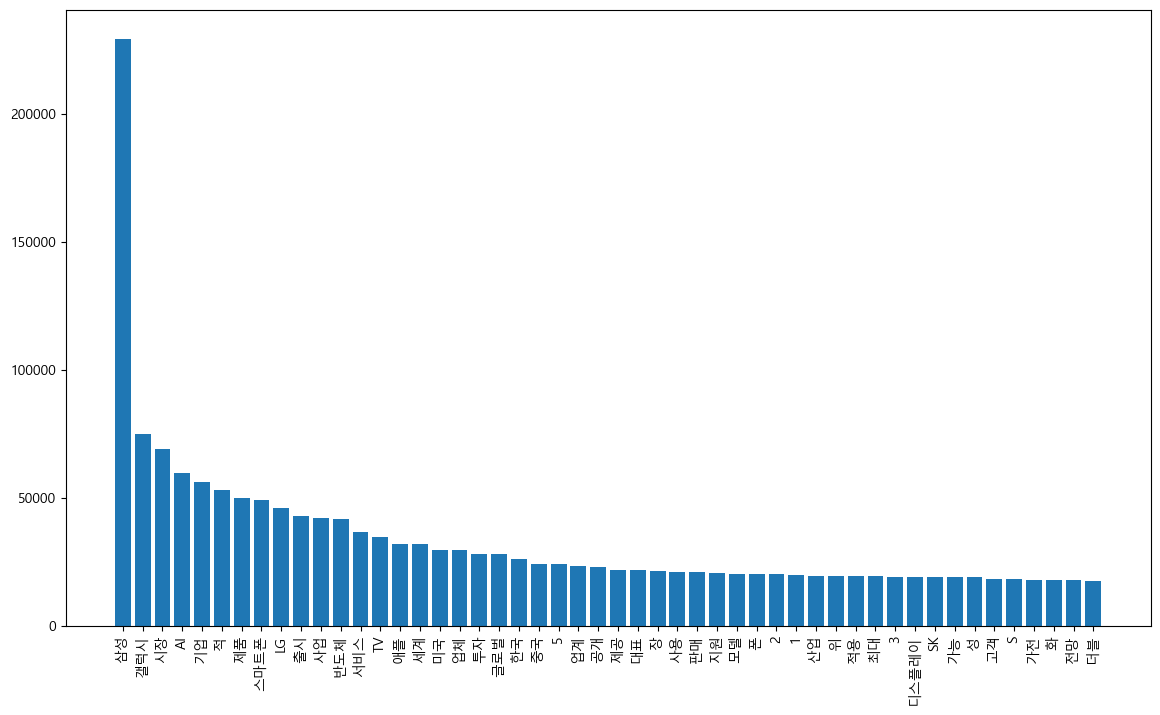

In [34]:
plt.figure(figsize=(14,8))

df_bigkinds['제목_키워드_전처리후_Okt'] = df_bigkinds['제목_키워드_전처리후_Okt'].astype(str)

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후_Okt']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

Hannanum

In [36]:
# 불용어 제거 함수 정의
def remove_stopwords(text):
    # text가 NaN 또는 float인 경우 빈 문자열로 처리
    if isinstance(text, float) or pd.isna(text):
        return ""

    tokens = hannanum.morphs(text)  # 형태소 단위로 분리
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# '세부내용' 열에 불용어 제거 함수 적용
df_bigkinds['제목_키워드_전처리후_Hannanum'] = df_bigkinds['제목_키워드_전처리후'].apply(remove_stopwords)

In [37]:
df_bigkinds[['일자','제목_키워드_전처리후','제목_키워드_전처리후_Hannanum']][0:50]

,일자,제목_키워드_전처리후,제목_키워드_전처리후_Hannanum
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 알 영화 틀 주 고 요리 성큼 다가오 ㄴ 스마트홈 AI 영화 요리 스마트홈 독...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG유플러스 천안역사 동아 라이크 텐 홈IoT 플랫폼 구축 LG유플러스 라이크 천안...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤노트8 100만원 웃돌 듯 고동진 낮추 려 노력 었지만 어렵 삼성 갤노트 1...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 시ㄹ 완판 소...
5,2017-09-01,깃털처럼 가볍다 시장구도 바꿀것 LG V30 외신들 호평 깃털 시장구 LG 외신 호...,깃털 처럼 가볍 다 시장구 도 바꾸 ㄹ LG V30 외 시ㄴ들 호평 깃털 시장구 L...
6,2017-09-01,삼성 자율주행차 실리콘밸리 면허 땄다 삼성 자율 주행차 실리콘밸리 면허 땄다 미국 ...,삼성 자율주행차 실리콘밸리 면허 뜨 었다 삼성 자율 주행차 실리콘밸리 면허 뜨 었다...
7,2017-09-01,삼성 자율주행차 실리콘밸리 돌아다닌다 삼성 자율 주행차 실리콘밸리 실리콘밸리 삼성전...,삼성 자율주행차 실리콘밸리 돌아다니 ㄴ다 삼성 자율 주행차 실리콘밸리 실리콘밸리 삼...
8,2017-09-01,배당주펀드엔 삼성전자 KB금융 안빠지네 배당주펀드 삼성전자 KB금융 안빠지네 수익 ...,배당주펀드엔 삼성전자 KB 금융 안빠지네 배당주펀드 삼성전자 KB 금융 안빠지네 수...
9,2017-09-01,삼성전자 서 자율차 시험운행 나선다 애플 구글에 도전장 삼성전자 자율차 시험 운행 ...,삼성전자 서 자율차 시험운행 나서 ㄴ다 애플 구글 도전장 삼성전자 자율차 시험 운행...


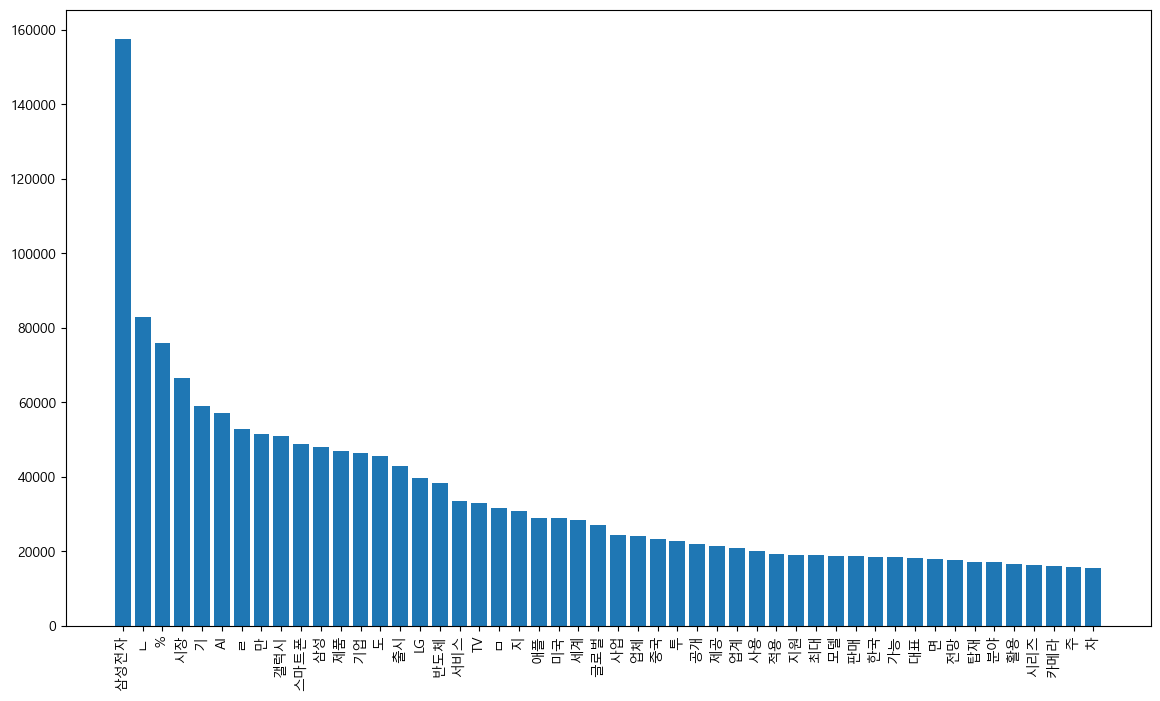

In [38]:
plt.figure(figsize=(14,8))

df_bigkinds['제목_키워드_전처리후_Hannanum'] = df_bigkinds['제목_키워드_전처리후_Hannanum'].astype(str)

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후_Hannanum']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

Kkma

In [40]:
# 불용어 제거 함수 정의
def remove_stopwords(text):
    # text가 NaN 또는 float인 경우 빈 문자열로 처리
    if isinstance(text, float) or pd.isna(text):
        return ""

    tokens = kkma.morphs(text)  # 형태소 단위로 분리
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# '세부내용' 열에 불용어 제거 함수 적용
df_bigkinds['제목_키워드_전처리후_Kkma'] = df_bigkinds['제목_키워드_전처리후'].apply(remove_stopwords)

In [41]:
df_bigkinds[['일자','제목_키워드_전처리후','제목_키워드_전처리후_Kkma']][0:50]

,일자,제목_키워드_전처리후,제목_키워드_전처리후_Kkma
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 알 아서 영화 튿 주고 요리 성큼 다가오 ㄴ 스마트 홈 AI 영화 요리 스마트...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG 유 플러스 천안 역사 동아 라이크 터 ㄴ 홈 IoT 플랫폼 구축 LG 유 플러...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot-Line 해성 옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성 옵틱스 확대...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 개 ㄹ 노트 8 100 만 원 웃돌 듯 고동진 낮추 려 노력 었 어렵 삼성 개...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 개 ㄹ 노트 FE 사실상 ㄴ 판 소비자 신뢰 회복 방 증 삼성 개 ㄹ 노트 F...
5,2017-09-01,깃털처럼 가볍다 시장구도 바꿀것 LG V30 외신들 호평 깃털 시장구 LG 외신 호...,깃털 처럼 가볍 다 시장 구도 바꾸 ㄹ LG V 30 외신 호 평 깃털 시장 LG ...
6,2017-09-01,삼성 자율주행차 실리콘밸리 면허 땄다 삼성 자율 주행차 실리콘밸리 면허 땄다 미국 ...,삼성 자율 주행 차 실리콘밸리 면허 따 었 다 삼성 자율 주행 차 실리콘밸리 면허 ...
7,2017-09-01,삼성 자율주행차 실리콘밸리 돌아다닌다 삼성 자율 주행차 실리콘밸리 실리콘밸리 삼성전...,삼성 자율 주행 차 실리콘밸리 돌아다니 ㄴ다 삼성 자율 주행 차 실리콘밸리 실리콘밸...
8,2017-09-01,배당주펀드엔 삼성전자 KB금융 안빠지네 배당주펀드 삼성전자 KB금융 안빠지네 수익 ...,배당주 펀드 는 삼성전자 KB 금융 안 빠지 배당 주 펀드 삼성전자 KB 금융 안 ...
9,2017-09-01,삼성전자 서 자율차 시험운행 나선다 애플 구글에 도전장 삼성전자 자율차 시험 운행 ...,삼성전자 스 자율 차 시험 운행 나서 ㄴ다 애플 글 도전장 삼성전자 자율 차 시험 ...


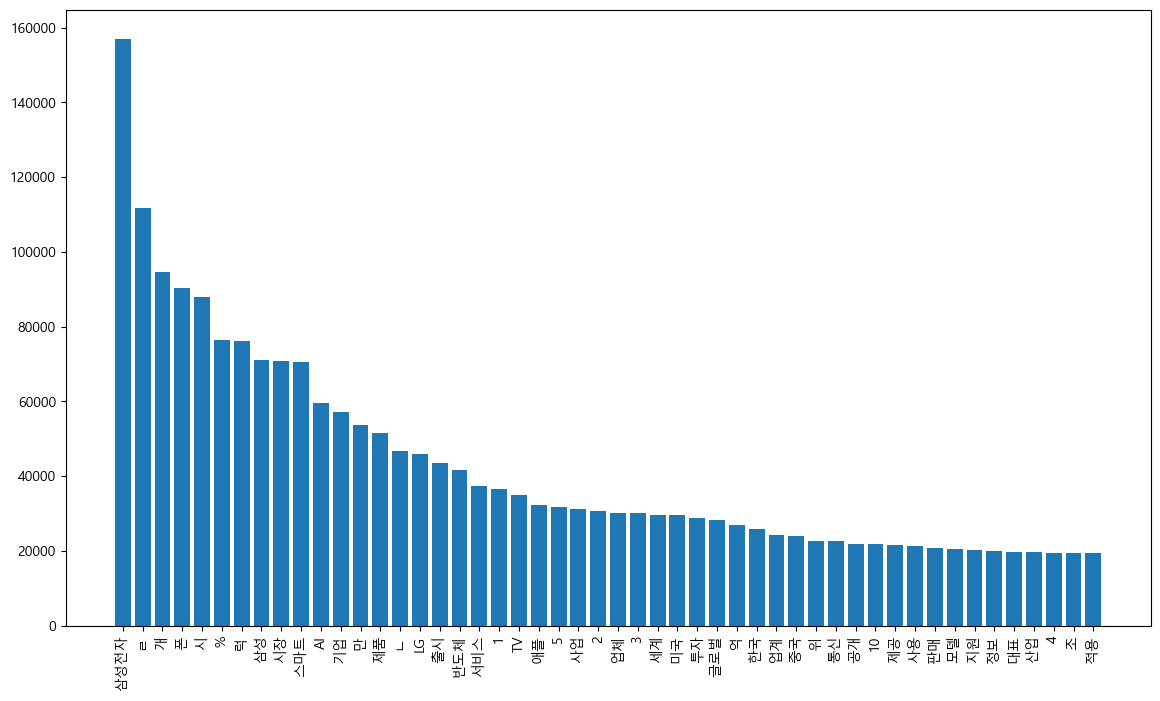

In [43]:
plt.figure(figsize=(14,8))

df_bigkinds['제목_키워드_전처리후_Kkma'] = df_bigkinds['제목_키워드_전처리후_Kkma'].astype(str)

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후_Kkma']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

Komoran

In [45]:
# 불용어 제거 함수 정의
def remove_stopwords(text):
    # text가 NaN 또는 float인 경우 빈 문자열로 처리
    if isinstance(text, float) or pd.isna(text):
        return ""

    tokens = komoran.morphs(text)  # 형태소 단위로 분리
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# '세부내용' 열에 불용어 제거 함수 적용
df_bigkinds['제목_키워드_전처리후_Komoran'] = df_bigkinds['제목_키워드_전처리후'].apply(remove_stopwords)

In [46]:
df_bigkinds[['일자','제목_키워드_전처리후','제목_키워드_전처리후_Komoran']][0:50]

,일자,제목_키워드_전처리후,제목_키워드_전처리후_Komoran
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 알 아서 영화 틀 주 고 요리 성큼 다가오 ㄴ 스마트 홈 AI 영화 요리 스마...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 개 ㄹ 노트 FE 사실 상 완파 ㄴ 소비자 신뢰 회복 방증 삼성 개 ㄹ 노트 ...
5,2017-09-01,깃털처럼 가볍다 시장구도 바꿀것 LG V30 외신들 호평 깃털 시장구 LG 외신 호...,깃털 처럼 가볍 다 시 장구도 바꾸 ㄹ LG V 30 외신 호평 깃털 시 장구 LG...
6,2017-09-01,삼성 자율주행차 실리콘밸리 면허 땄다 삼성 자율 주행차 실리콘밸리 면허 땄다 미국 ...,삼성 자율 주행 차 실리콘밸리 면허 따 았 다 삼성 자율 주행 차 실리콘밸리 면허 ...
7,2017-09-01,삼성 자율주행차 실리콘밸리 돌아다닌다 삼성 자율 주행차 실리콘밸리 실리콘밸리 삼성전...,삼성 자율 주행 차 실리콘밸리 돌아다니 ㄴ다 삼성 자율 주행 차 실리콘밸리 실리콘밸...
8,2017-09-01,배당주펀드엔 삼성전자 KB금융 안빠지네 배당주펀드 삼성전자 KB금융 안빠지네 수익 ...,배 당주 펀드 ㄴ 삼성전자 KB 금융 안 빠지 배 당주 펀드 삼성전자 KB 금융 안...
9,2017-09-01,삼성전자 서 자율차 시험운행 나선다 애플 구글에 도전장 삼성전자 자율차 시험 운행 ...,삼성전자 서 자율 차 시험 운행 나서 ㄴ다 애플 구글 도전장 삼성전자 자율 차 시험...


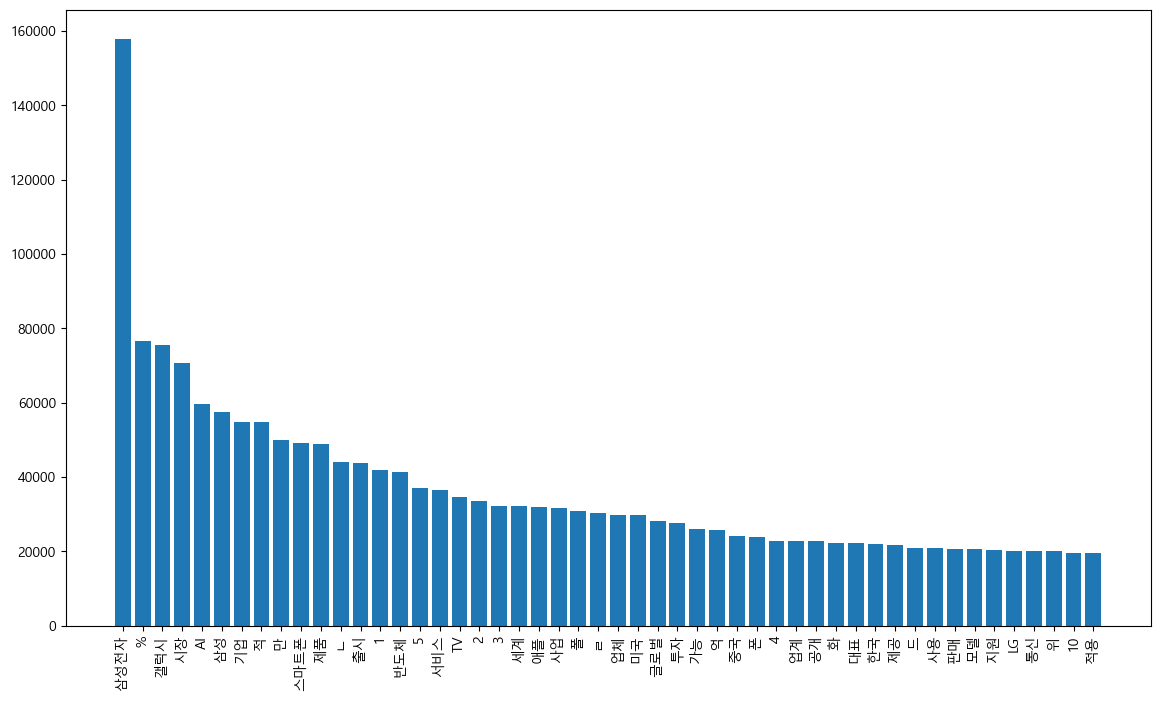

In [47]:
plt.figure(figsize=(14,8))

df_bigkinds['제목_키워드_전처리후_Komoran'] = df_bigkinds['제목_키워드_전처리후_Komoran'].astype(str)

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후_Komoran']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]  # 21번째에서 40번째 단어
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

형태소 분석 성능이 만족스럽지 않아 키위 설치

In [49]:
from kiwipiepy import Kiwi

# Kiwi 객체 생성
kiwi = Kiwi()
# 시간 측정 시작
start_time = time.time()

# 텍스트를 형태소 분석하여 결과를 반환하는 함수
def analyze_text(text):
    result = kiwi.analyze(text)
    return result

# 형태소 분석 결과에서 명사를 추출하는 함수
def extract_nouns(text):
    nouns = []
    result = analyze_text(text)
    for token, pos, _, _ in result[0][0]:
        # 명사,알파벳,숫자
        # NNB : 11.1배의 배포함
        if len(token) != 1 and (pos.startswith('N') or pos.startswith('SL') or pos.startswith('VA') or
                                pos.startswith('SN') or pos.startswith('SF') or pos.startswith('SS') or
                                pos.startswith('MM') or pos.startswith('SY') or pos.startswith('NNB')):
            nouns.append(token)
    return nouns

# 텍스트 예시
tokenized_texts = [extract_nouns(text) for text in df_bigkinds['제목_키워드_전처리후']]

# 시간 측정 종료
end_time = time.time()

# 토큰화 시간 출력
print(f"Tokenization time: {end_time - start_time} seconds")
#print(tokenized_texts)

Tokenization time: 413.1869993209839 seconds


In [52]:
# '세부내용' 열에 불용어 제거 함수 적용
def remove_stopwords(text):
    # text가 NaN 또는 float인 경우 빈 문자열로 처리
    if isinstance(text, float) or pd.isna(text):
        return ""

    tokens = extract_nouns(text)
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

df_bigkinds['제목_키워드_전처리후_kiwi'] = df_bigkinds['제목_키워드_전처리후'].apply(remove_stopwords)

In [53]:
df_bigkinds[['일자','제목_키워드_전처리후','제목_키워드_전처리후_kiwi']]

,일자,제목_키워드_전처리후,제목_키워드_전처리후_kiwi
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,AI 영화 요리 스마트홈 AI 영화 요리 스마트홈 독일 세계 가전 박람회 IFA 전...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG유플러스 천안 역사 동아 라이크 IoT 플랫폼 구축 LG유플러스 라이크 천안 역...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot Line 해성옵틱스 듀얼 카메라 확대 수혜 기대 해성옵틱스 확대 듀얼 카메라...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤노트8 100 고동진 노력 어렵 삼성 노트 100 고동진 노력 노트 삼성전자...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 갤노트 FE 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 완판 소비자 방증 ...
...,...,...,...
37455,2024-08-30,주식 초고수는 지금 삼성전자 노키아 모바일 네트워크 인수 관심 소식에 순매수 1위 ...,주식 고수 삼성전자 노키아 모바일 네트워크 인수 관심 소식 매수 삼성전자 노키아 모...
37456,2024-08-30,삼성전자 노키아 모바일 네트워크 부문 인수에 관심 표명 삼성전자 네트워크 인수 노키...,삼성전자 노키아 모바일 네트워크 부문 인수 관심 표명 삼성전자 네트워크 인수 노키아...
37457,2024-08-30,삼성전자 노키아 모바일 네트워크 인수하나 블룸버그 관심 보여 삼성전자 노키아 모바일...,삼성전자 노키아 모바일 네트워크 인수 블룸버그 관심 삼성전자 노키아 모바일 네트워크...
37458,2024-08-30,삼성전자 노키아 통신장비 사업부 품나 삼성전자 노키아 통신 장비 사업부 품나 삼성전...,삼성전자 노키아 통신 장비 사업부 삼성전자 노키아 통신 장비 사업부 삼성전자 노키아...


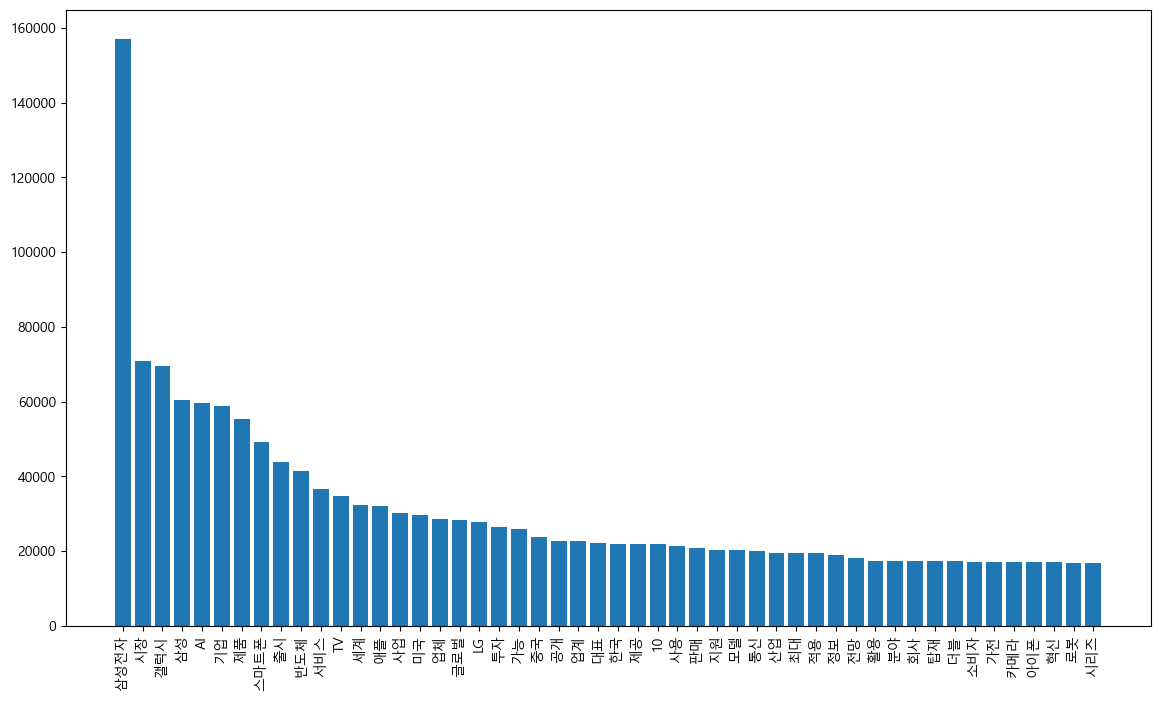

In [54]:
plt.figure(figsize=(14,8))

df_bigkinds['제목_키워드_전처리후_kiwi'] = df_bigkinds['제목_키워드_전처리후_kiwi'].astype(str)

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후_kiwi']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]  # 21번째에서 40번째 단어
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

Komoran_명사

In [56]:
# '세부내용' 열에 불용어 제거 함수 적용
def remove_stopwords(text):
    # text가 NaN 또는 float인 경우 빈 문자열로 처리
    if isinstance(text, float) or pd.isna(text):
        return ""

    tokens = komoran.nouns(text)  # 형태소 단위로 분리
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

df_bigkinds['제목_키워드_전처리후_Komoran_명사'] = df_bigkinds['제목_키워드_전처리후'].apply(remove_stopwords)

In [57]:
df_bigkinds[['일자','제목_키워드_전처리후','제목_키워드_전처리후_Komoran_명사']][0:50]

,일자,제목_키워드_전처리후,제목_키워드_전처리후_Komoran_명사
0,2017-09-01,AI가 알아서 영화 틀어주고 요리까지 성큼 다가온 스마트홈 AI 영화 요리 스마트홈...,영화 요리 스마트 홈 영화 요리 스마트 홈 독일 세계 가전 박람회 업체 경쟁 현지 ...
1,2017-09-01,LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG유플러스 천안 역사 동아 라이 텐 홈 플랫폼 구축 LG유플러스 라이 천안 역사 ...
2,2017-09-01,Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,카메라 확대 수혜 기대 확대 카메라 수혜 유진 투자 증권 채택 카메라 수혜 설립 전...
3,2017-09-01,삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 노트 만원 고동진 노력 삼성 노트 고동진 노력 노트 삼성전자 갤럭시 노트 가격...
4,2017-09-01,삼성 갤노트FE 사실상 완판 소비자 신뢰 회복 방증 삼성 갤노트 FE 사실 완판 소...,삼성 노트 FE 사실 완파 소비자 신뢰 회복 방증 삼성 노트 사실 완파 소비자 방증...
5,2017-09-01,깃털처럼 가볍다 시장구도 바꿀것 LG V30 외신들 호평 깃털 시장구 LG 외신 호...,깃털 시 장구도 LG V 30 외신 호평 깃털 시 장구 외신 호평 독일 세계 가전 ...
6,2017-09-01,삼성 자율주행차 실리콘밸리 면허 땄다 삼성 자율 주행차 실리콘밸리 면허 땄다 미국 ...,삼성 자율 주행 차 실리콘밸리 면허 삼성 자율 주행 차 실리콘밸리 면허 미국 실리콘...
7,2017-09-01,삼성 자율주행차 실리콘밸리 돌아다닌다 삼성 자율 주행차 실리콘밸리 실리콘밸리 삼성전...,삼성 자율 주행 차 실리콘밸리 삼성 자율 주행 차 실리콘밸리 실리콘밸리 삼성전자 로...
8,2017-09-01,배당주펀드엔 삼성전자 KB금융 안빠지네 배당주펀드 삼성전자 KB금융 안빠지네 수익 ...,배 당주 펀드 삼성전자 금융 배 당주 펀드 삼성전자 금융 수익 배 당주 펀드 삼성전...
9,2017-09-01,삼성전자 서 자율차 시험운행 나선다 애플 구글에 도전장 삼성전자 자율차 시험 운행 ...,삼성전자 자율 차 시험 운행 애플 구글 도전장 삼성전자 자율 차 시험 운행 애플 구...


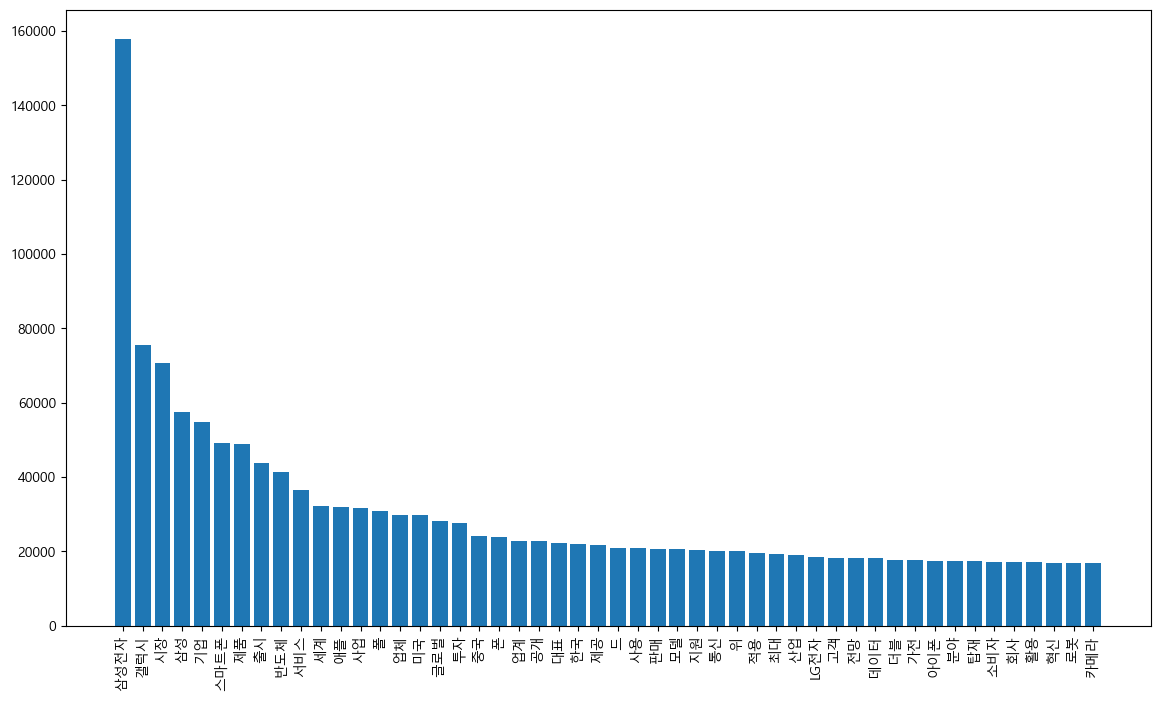

In [59]:
plt.figure(figsize=(14,8))

df_bigkinds['제목_키워드_전처리후_Komoran_명사'] = df_bigkinds['제목_키워드_전처리후_Komoran_명사'].astype(str)

# 단어 빈도 계산
word_counts = Counter(' '.join(df_bigkinds['제목_키워드_전처리후_Komoran_명사']).split())

# 상위 20개 단어 시각화
common_words  = word_counts.most_common()[0:50]  # 21번째에서 40번째 단어
words, counts = zip(*common_words)

plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

In [61]:
# '제목_키워드_전처리후'가 공백인 행만 필터링
df_blank = df_bigkinds[df_bigkinds['제목_키워드_전처리후'].str.strip() == '']

# 필터링된 행들 출력
df_blank

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사


In [62]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사'],
      dtype='object')

In [63]:
df_bigkinds.to_excel('./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후.xlsx', index=False)

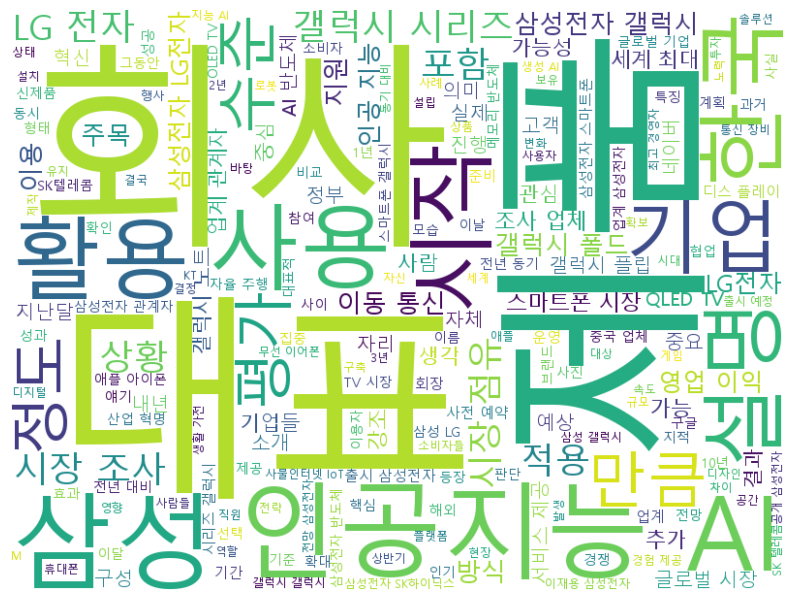

In [64]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

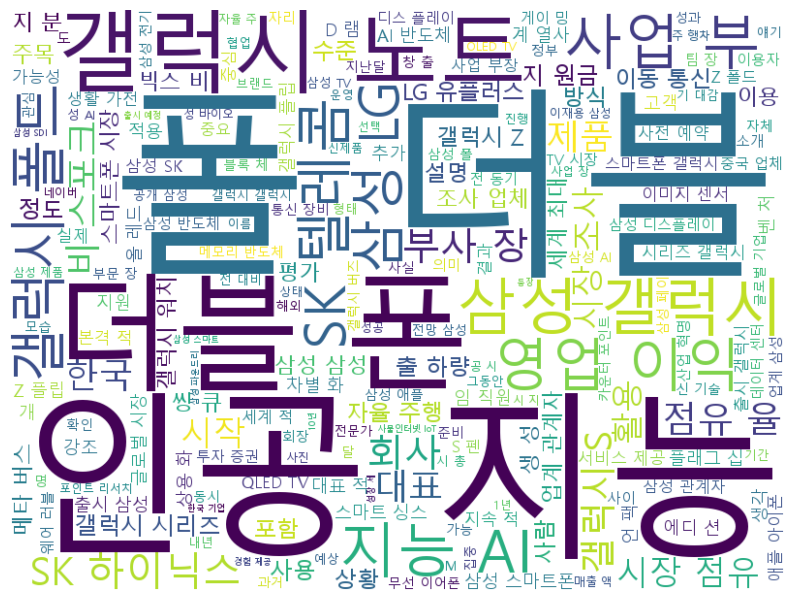

In [65]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후_Okt'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

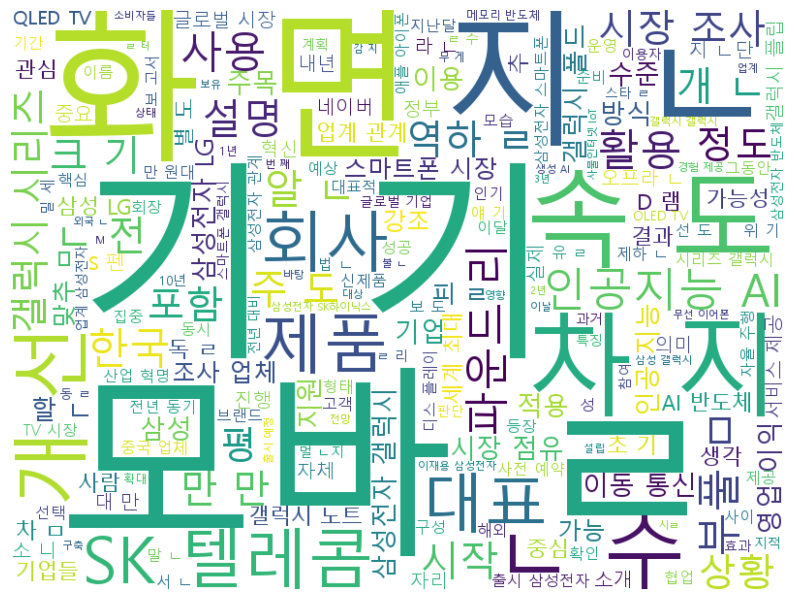

In [66]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후_Hannanum'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

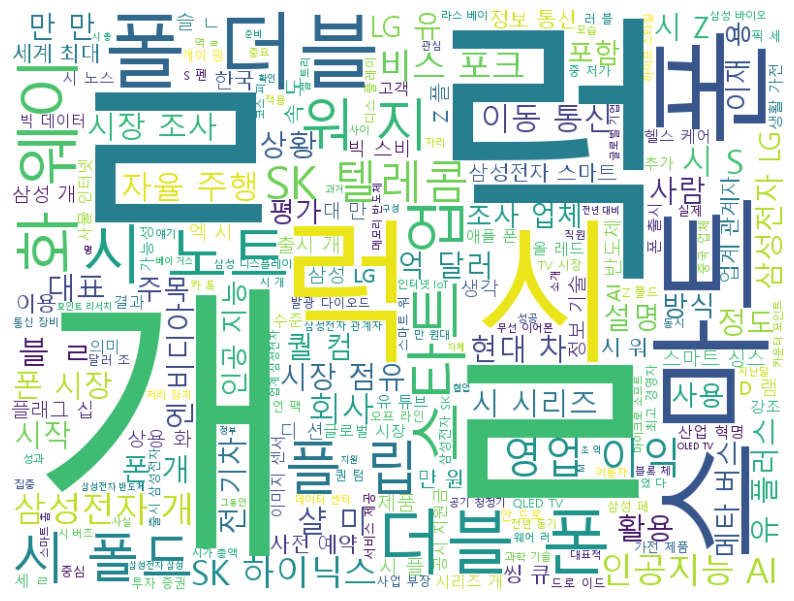

In [67]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후_Kkma'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

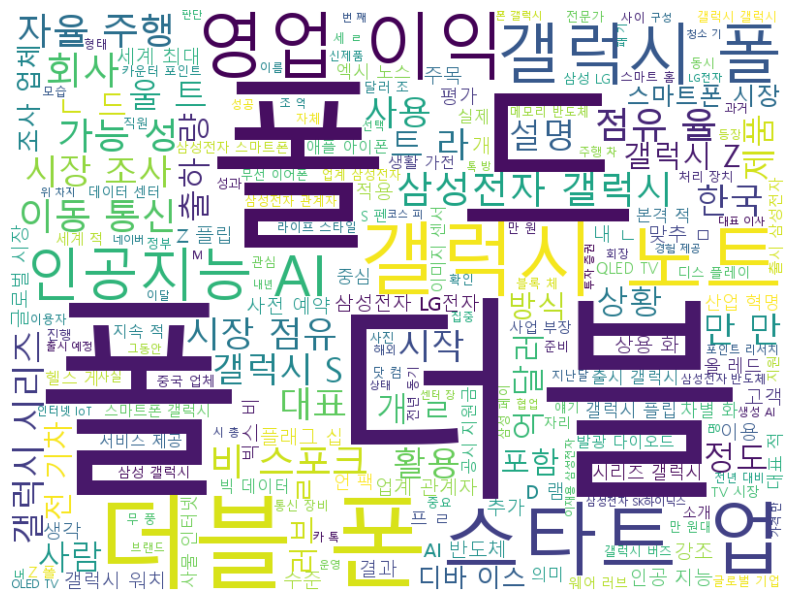

In [68]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후_Komoran'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

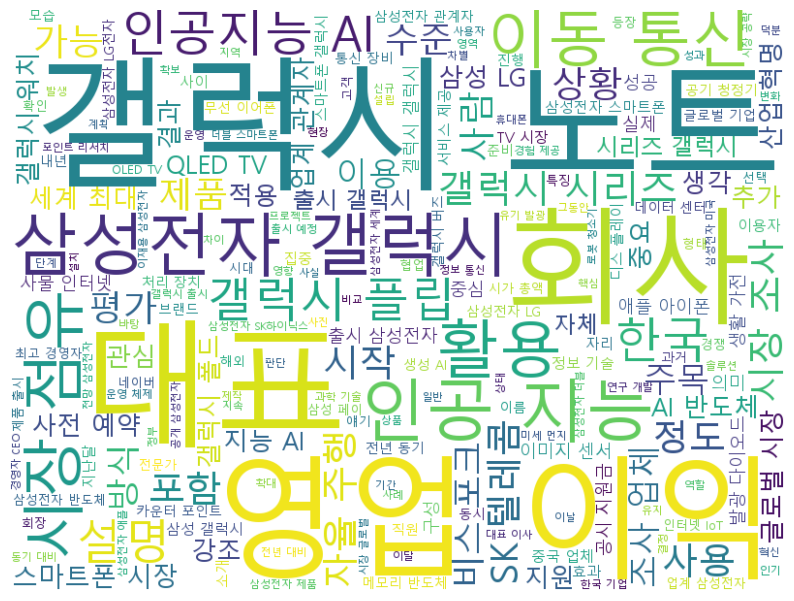

In [69]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후_kiwi'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

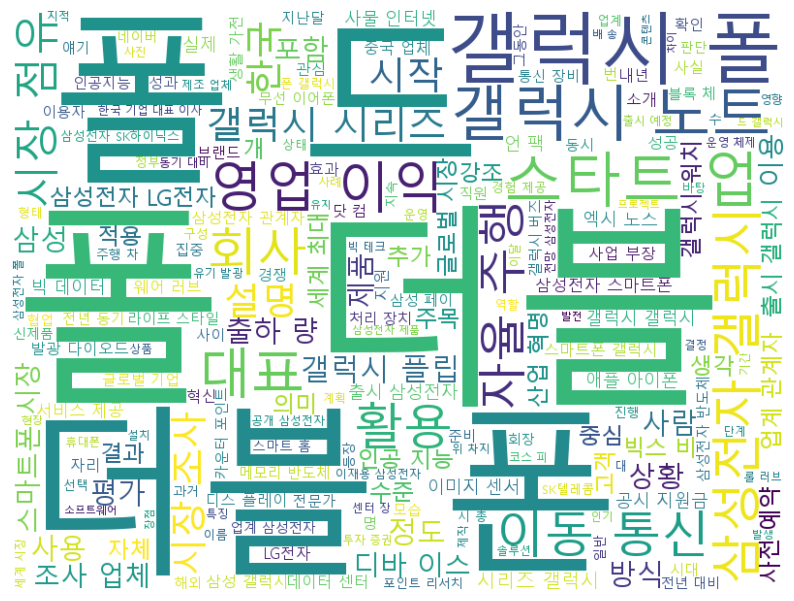

In [70]:
# 제목과 세부내용 전처리 후 텍스트를 모두 하나의 문자열로 결합
text_data = " ".join(df_bigkinds['제목_키워드_전처리후_Komoran_명사'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf', # 한글 폰트 설정 (Windows에서 한글 폰트 경로를 지정)
    background_color='white',
    width=800,
    height=600
).generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

In [71]:
df_bigkinds['일자'] = pd.to_datetime(df_bigkinds['일자'])

In [72]:
df_count = df_bigkinds.groupby('일자').size().reset_index(name='건수')

# 결과 출력
print(df_count)

             일자  건수
0    2017-09-01  20
1    2017-09-02  10
2    2017-09-03  11
3    2017-09-04  16
4    2017-09-05  23
...         ...  ..
2523 2024-08-26  18
2524 2024-08-27  20
2525 2024-08-28  10
2526 2024-08-29  16
2527 2024-08-30  11

[2528 rows x 2 columns]


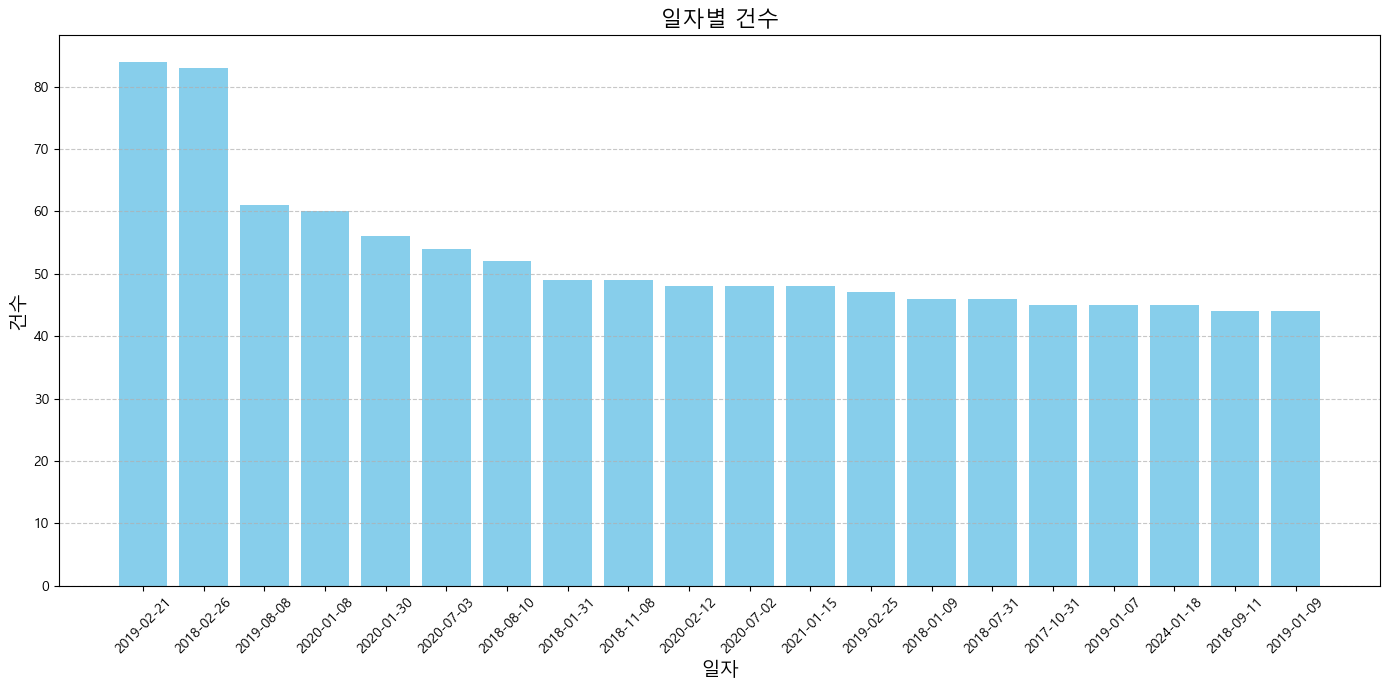

In [73]:
# 작성일별 건수 상위 20개 선택
df_count = df_count.nlargest(20, '건수')

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.bar(df_count['일자'].dt.strftime('%Y-%m-%d'), df_count['건수'], color='skyblue')

plt.xlabel('일자', fontsize=14)
plt.ylabel('건수', fontsize=14)
plt.title('일자별 건수', fontsize=16)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()